<a href="https://colab.research.google.com/github/yeb2Binfang/sklearn_learning/blob/main/decision_tree/Bonus_Chapter%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

我们将在不同结构的数据集上测试决策树的效果，更好地去理解决策树

##import some necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

##Generate three different datasets
we will use sklearn build_in database to generate three datasets which are moon shape, circle shape, and binary shape


###二分型数据
Randomly generate 100 samples with two labels

In [11]:
#make_classification database to generate 二分型数据
X, y = make_classification(n_samples = 100 #100 samples
                           ,n_features = 2  #2 features,
                           ,n_redundant = 0
                           ,n_informative = 2
                           ,random_state = 1
                           ,n_clusters_per_class = 1
                          )
print(X[0:5])
print(y[0:5])

[[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]
 [-0.90731836  1.06040861]]
[1 0 0 1 1]


we can plot the data to see what it looks like

我们从图中可以看出，两个分类还是很明显的，这样不利于我们测试分类器的效果

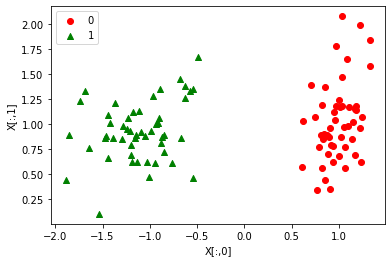

In [12]:
for i in range(len(y)):
  if y[i] == 0:
    s1 = plt.scatter(X[i,0],X[i,1],c='r')
  else:
    s2 = plt.scatter(X[i,0],X[i,1],c='g',marker='^')
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

所以，我们可以用np生成随机数组，让这些数据点可以加减0~1之间的随机数。但是不能运行多次

In [13]:
rng = np.random.RandomState(2) #random mode
X += 2*rng.uniform(size=X.shape)


In [14]:
linearly_separable = (X,y)#把二分数据给保存起来

我们把新数据用图来展示，看看是什么样子的

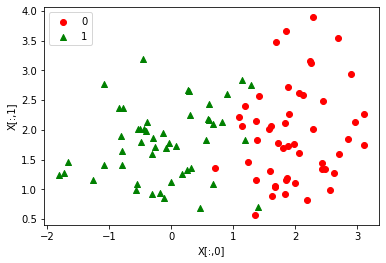

In [15]:
for i in range(len(y)):
  if y[i] == 0:
    s1 = plt.scatter(X[i,0],X[i,1],c='r')
  else:
    s2 = plt.scatter(X[i,0],X[i,1],c='g',marker='^')
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

###generate moon dataset

In [16]:
X_moon, y_moon = make_moons(n_samples=100,noise=0.3,random_state=0)
print(X[0:5])
print(y[0:5])

[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]
 [-0.30800901  1.59406316]]
[1 0 0 1 1]


In [17]:
moon_shape_data = (X_moon, y_moon) #store the moon dataset

visualize the moon shape dataset

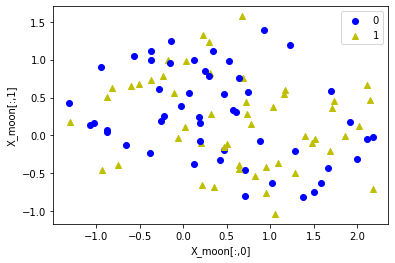

In [18]:
for i in range(len(y_moon)):
  if y[i] == 0:
    s1 = plt.scatter(X_moon[i,0],X_moon[i,1],c='b')
  else:
    s2 = plt.scatter(X_moon[i,0],X_moon[i,1],c='y',marker='^')
plt.xlabel("X_moon[:,0]")
plt.ylabel("X_moon[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

###generate circles dataset

In [19]:
X_circles, y_circles = make_circles(n_samples=100,noise = 0.2, factor = 0.5, random_state=1)
print(X[0:5])
print(y[0:5])

[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]
 [-0.30800901  1.59406316]]
[1 0 0 1 1]


In [20]:
circle_shape_data = (X_circles,y_circles)#保存circle data

visualize circle dataset

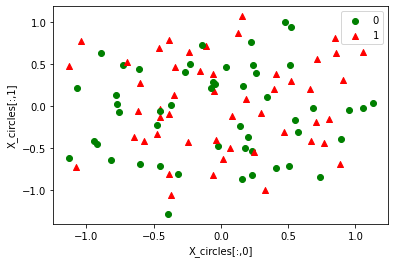

In [21]:
for i in range(len(y_circles)):
  if y[i] == 0:
    s1 = plt.scatter(X_circles[i,0],X_circles[i,1],c='g')
  else:
    s2 = plt.scatter(X_circles[i,0],X_circles[i,1],c='r',marker='^')
plt.xlabel("X_circles[:,0]")
plt.ylabel("X_circles[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

将三组数据打包起来放进datasets中

In [22]:
datasets = [moon_shape_data,circle_shape_data,linearly_separable]

##画出三种数据集合三棵决策树的分类效应图像

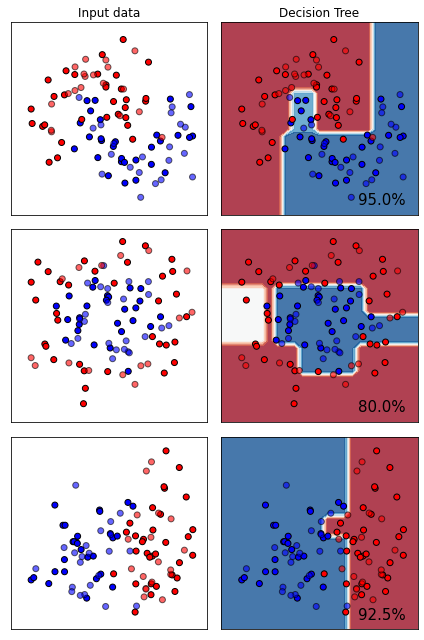

In [36]:
#create figure the size is 6*9
figure = plt.figure(figsize=(6,9))

#the global variable which uses to indicate the graph position
i = 1

#iterate the dataset
for ds_index, ds in enumerate(datasets):
  #对数据进行标准化处理
  X, y = ds
  X = StandardScaler().fit_transform(X)
  #training dataset and test dataset
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)

  X1_min, X1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
  X2_min, X2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

  array1, array2 = np.meshgrid(np.arange(X1_min, X1_max, 0.2),
                               np.arange(X2_min, X2_max, 0.2))
  

  #生成彩色画布
  #用ListedColormap为画布创建颜色， #FF0000正红， #0000FF正蓝
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
  ax = plt.subplot(len(datasets),2,i)

  #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
  #我们有3个坐标系，但是我们只需要在第一个坐标系上有标题，因此设定if ds_index == 0这个条件
  if ds_index == 0:
    ax.set_title("Input data")

  #将数据集的分布放到我们坐标系上
  #先放训练集
  ax.scatter(X_train[:,0], X_train[:,1], c=y_train,
             cmap=cm_bright,edgecolors='k')

  #放测试集
  ax.scatter(X_test[:,0],X_test[:,1],c=y_test,
             cmap = cm_bright, alpha = 0.6, edgecolors = 'k')
  
  #为图设置坐标轴的最大值和最小值
  ax.set_xlim(array1.min(), array1.max())
  ax.set_ylim(array2.min(), array2.max())

  #如果想去掉坐标轴的话
  ax.set_xticks(())
  ax.set_yticks(())

  i+=1
  
  #到这里为止，数据集的处理就已经结束了，就是做了一些标准化处理，然后看看图形变成怎么样了
 
  #############################从这开始就是决策树模型了########################################

  #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)，使用索引i定义图的位置
  #ax = plt.subplot(len(datasets),2,i)，这个就表示三行两列
  #在函数最开始，我们定义了i=1,并且在上边建立数据集图像的时候，已经让i+=1
  #所以，每次循环中，在这里，要取值 2,4,6
  ax = plt.subplot(len(datasets),2,i)

  #决策树的建模过程
  clf = DecisionTreeClassifier(max_depth=5)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)

  #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min, X1_max] * [X2_min, X2_max]
  #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
  #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
  #由于决策树在训练的时候导入训练集X_train里有两个特征，所以，我们在计算类概率的时候，也必须导入结构相同的数组，也就是说，必须有两个特征
  #ravel()能够将一个多维数组转换成一维数组
  #np.c_是能够将两个数组组合起来的函数

  #在这里，我们先将两个网络数据降维到一维数组，再讲两个数组连接变成含有两个特征的数据，
  #再代入决策树模型，生成的Z包含数据的索引和每个样本对应的类概率，再切片，切除类概率
  #Predict will give either 0 or 1 as output
  #Predict_proba will give the only probability of 1.
  #我们这个array1和array2就是坐标轴的数据，我们只是用这个坐标的数据来产生相对应的y值  
  Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:,1]

  #np.c_[np.array([1,2,3], np.array([4,5,6]))]

  #将返回的类概率作为数据，放到contourf里面去绘制轮廓
  Z = Z.reshape(array1.shape)
  #然后把上面产生的对应画在图中，不过是画个轮廓
  #contour就是轮廓的意思
  ax.contourf(array1,array2,Z,cmap = cm,alpha=0.8)

  #将数据集的分布放到我们的坐标系上
  #将训练集放到图中去

  #先放训练集
  ax.scatter(X_train[:,0], X_train[:,1], c=y_train,
             cmap=cm_bright,edgecolors='k')

  #放测试集
  ax.scatter(X_test[:,0],X_test[:,1],c=y_test,
             cmap = cm_bright, alpha = 0.6, edgecolors = 'k')
  
  #为图设置坐标轴的最大值和最小值
  ax.set_xlim(array1.min(), array1.max())
  ax.set_ylim(array2.min(), array2.max())

  #如果想去掉坐标轴的话
  ax.set_xticks(())
  ax.set_yticks(())

  #我们有3个坐标系，但是我们只需要在第一个坐标系上有标题，因此设定if ds_index == 0这个条件
  if ds_index == 0:
    ax.set_title("Decision Tree")

  #写在右下角的数字
  ax.text(array1.max()-0.3, array2.min() + 0.3, ('{:.1f}%'.format(score*100)),
          size = 15, horizontalalignment = 'right')

  i+=1

plt.tight_layout()
plt.show()

